# A Review of [WILDS: A Benchmark of in-the-Wild Distribution Shifts](https://arxiv.org/pdf/2012.07421.pdf)

In [2]:
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms as transforms

# Load the full dataset, and download it if necessary
dataset = get_dataset(dataset='iwildcam', download=True)

# Get the training set
train_data = dataset.get_subset('train',
                                transform=transforms.Compose([transforms.Resize((448,448)),
                                                              transforms.ToTensor()]))

# Prepare the standard data loader
train_loader = get_train_loader('standard', train_data, batch_size=16)

You can also download the dataset manually at https://wilds.stanford.edu/downloads.


100%|██████████| 11957420032/11957420032 [25:26<00:00, 7831723.13Byte/s]


Extracting data/iwildcam_v2.0/archive.tar.gz to data/iwildcam_v2.0
It took 29.16 minutes to download and uncompress the dataset.


In [2]:
!python ~/wilds/examples/run_expt.py --dataset iwildcam --algorithm ERM --root_dir data --progress_bar --frac 0.001 --n_epochs 1

Dataset: iwildcam
Algorithm: ERM
Root dir: data
Split scheme: official
Dataset kwargs: {}
Download: False
Frac: 0.001
Version: None
Loader kwargs: {'num_workers': 4, 'pin_memory': True}
Train loader: standard
Uniform over groups: False
Distinct groups: None
N groups per batch: 2
Batch size: 16
Eval loader: standard
Model: resnet50
Model kwargs: {'pretrained': True}
Transform: image_base
Target resolution: (448, 448)
Resize scale: None
Max token length: None
Loss function: cross_entropy
Loss kwargs: {}
Groupby fields: ['location']
Group dro step size: None
Coral penalty weight: 10.0
Irm lambda: 1.0
Irm penalty anneal iters: None
Algo log metric: accuracy
Val metric: F1-macro_all
Val metric decreasing: False
N epochs: 1
Optimizer: Adam
Lr: 3e-05
Weight decay: 0.0
Max grad norm: None
Optimizer kwargs: {}
Scheduler: None
Scheduler kwargs: {}
Scheduler metric split: val
Scheduler metric name: None
Process outputs function: multiclass_logits_to_pred
Evaluate all splits: True
Eval splits: []


[]

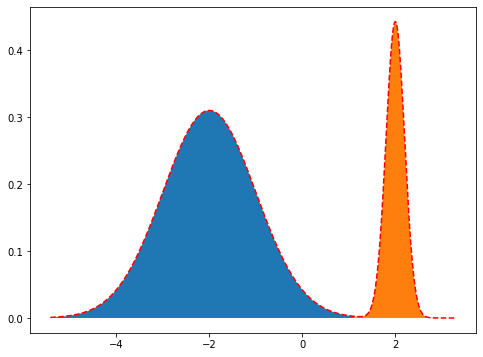

In [17]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)

x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
X_train = x_eval[:375]
X_test = x_eval[375:]

bimodal_pdf = (norm.pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size
               + norm.pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")
ax.fill_between(X_train, bimodal_pdf[:375])
ax.fill_between(X_test, bimodal_pdf[375:])

ax.plot()


## Problem statement
> What is the problem the paper aims to solve?

## Context/scope
> Why is this problem important or interesting?

## Existing work
> What has been done in literature?

## Contribution
> What is gap in literature that the paper is trying to fill? What is the unique contribution?

## Technical content (high level)
> What are the high level ideas behind their technical contribution?

## Technical content (details)
> Highlight (not copy and paste entire sections) the relevant details that are important to focus on (e.g. if there's a model, define it; if there is a theorem, state it and explain why it's important, etc).

## Experiments
> Which types of experiments were performed? What claims were these experiments trying to prove? Did the results prove the claims?

## Evaluation (your opinion)
> Do you think the work is technically sound? Do you think the proposed model/inference method is practical to use on real data and tasks? Do you think the experimental section was strong (there are sufficient evidence to support the claims and eliminate confounding factors)?

## Future work (for those interested in continuing research in a related field)
> Do you think you can suggest a concrete change or modification that would improve the existing solution(s) to the problem of interest? Try to implement some of these changes/modifications.

## Broader Impact
> How does this work potentially impact (both positively and negatively) the broader machine learning community and society at large when this technology is deployed? In the applications of this technology, who are the potentially human stakeholders? What are the potential risks to the interest of these stakeholders in the failure modes of this technology? Is there potential to exploit this technology for malicious purposes?

## Code
* At least one clear working pedagogical example demonstrating the problem the paper is claiming to solve. 
* At lease a bare bones implementation of the model/algorithm/solution (in some cases, you may be able to make assumptions  to simplify the model/algorithm/solution with the approval of your instructor)
* Demonstration on at least one instance that your implementation solves the problem.
* Demonstration on at least one instance the failure mode of the model/algorithm/solution, with an explanation for why failure occurred (is the dataset too large? Did you choose a bad hyper parameter?). The point of this is to point out edge cases to the user.

**NOTE**: Look at https://github.com/onefishy/am207_fall19_projects/blob/master/calibrated_uncertainty/calibrated_uncertainty_2/report.ipynb for inspiration regarding how they weaved code into the above sections.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80cb1556-c762-4c6a-89b8-6410c844af03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>